<a href="https://colab.research.google.com/github/vidhyavasan2002/Heart-Disease-Prediction-Using-Logistic-Regression/blob/main/Heart_Disease_UCI_Prediction_%26_Diagnosis_Project_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease UCI Prediction & Diagnosis
## Using Logistic Regression
## Code by Vidhya lakshmi Srinivasan
Dataset by Heart Disease UCI
## Dataset Column Description:
* age in years
* sex (1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol
serum cholestoral in mg/dl
* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg
resting electrocardiographic results
* thalach
maximum heart rate achieved
* exang
exercise induced angina (1 = yes; 0 = no)
* oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
* ca
number of major vessels (0-3) colored by flourosopy
* thal

Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target
1 or 0

#### Dataset source:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#### Context:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

# Table of contents
1. [Imports & reading dataset ](#1)
2. [Data Description](#2)
3. [Data Analysis](#3)
4. [Data Visualization](#4)
5. [Data Pre-processing](#5)
6. [Logistic Regression](#6)
7. [Conclusion](#7)

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1.Imports & reading dataset <a name="1"></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd#used for data frames
import numpy as np#numpy array
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# since we have to predict between 1 and 0, we will use Logistic
# Regression because it is favourable for binary classification
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('heart_disease_data.csv')

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

# 2.Data Description<a name="2"></a>

### * Describe

There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data mentioned below. So we are going to follow the second description.

1 - description

```
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
•	age: The person's age in years
•	sex: The person's sex (1 = male, 0 = female)
•	cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
•	trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
•	chol: The person's cholesterol measurement in mg/dl
•	fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
•	restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
•	thalach: The person's maximum heart rate achieved
•	exang: Exercise induced angina (1 = yes; 0 = no)
•	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
•	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
•	ca: The number of major vessels (0-3)
•	thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
•	target: Heart disease (0 = no, 1 = yes)
```





2 - description

```
Hi everyone, I chose this dataset for a final project on a multivariate statistics course I'm taking, and for the last couple of days I've been struggling to get the appropriate description of the features.
For some unknown reason, the dataset for download on Kaggle is VERY different from the one you can download at https://archive.ics.uci.edu/ml/datasets/heart+Disease
And what's worse: the description here on Kaggle is the same as the one in the Cleveland page, that means every interpretation you make based on the Kaggle dataset is WRONG.
So here it goes, the CORRECT description of the kaggle dataset.

cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina

restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping

thal
Results of the blood flow observed via the radioactive dye.

Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.

target (maybe THE most important feature): 0 = disease, 1 = no disease

A few more things to consider:
data #93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

I'll copy a sentence so you get more insight about the "thal" column (thal is for Thalium, a radioactive tracer injected during a stress test):
--Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a "reversible defect." Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a "fixed defect." --

You can check all of this by comparing the Kaggle and the UCI datasets. Feel free to ask/correct/comment/say hi.

To open a .data file, change the extension to a .txt and then open it with excel or similars.

You're welcome!
```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### * Null

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# 1 heart disease
# 0 no disease

# split features into X and what u have to preeict into y

X=df.drop(columns='target',axis=1)
# axis=1 if u are dropping column and 0 if u are dropping row
Y=df['target']

In [25]:
X


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [26]:
Y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

<Axes: title={'center': 'Finding Null Values Using Heatmap\n'}>

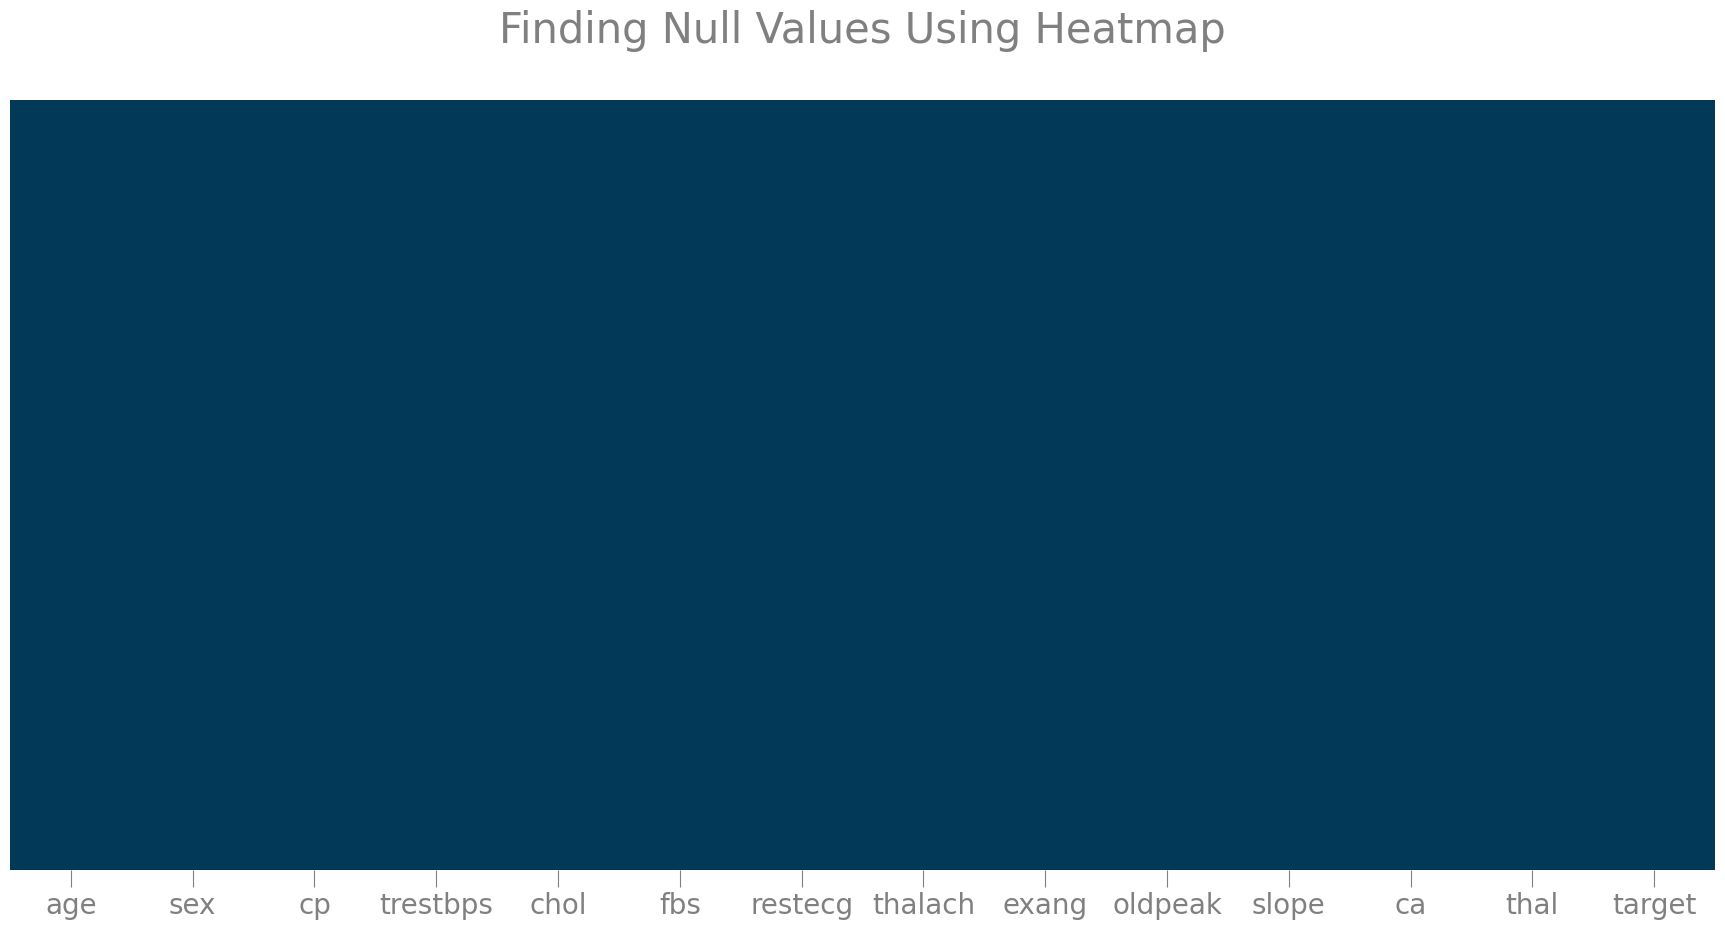

In [ ]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [ ]:
model=LogisticRegression()

In [28]:
# splitting into train and split
# stratify- 0's and 1's will be split evenly between train and test
# if not mentioned its possible that x-train may only get all zeroes
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=5)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [31]:
# train ML model
model.fit(X_train,Y_train)
# will find relations between features and target

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

No Null values

In [32]:
# making a prediction system
# inputing a tuple
input=(56,1,1,120,236,0,1,178,0,0.8,2,0,2)
# input data to tuple
input_numpy_arr=np.asarray(input)

# reshape to predict only for only 1 tuple
input_reshaped=input_numpy_arr.reshape(1,-1)

prediction=model.predict(input_reshaped)
print(prediction)

if(prediction[0]==0):
  print("The patient has no heart disease")
else:
  print("The patient has a heart disease")


[1]
The patient has a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### * pandas-profiling

In [33]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 22.6 MB 26.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=5b9075e16d1804200dd967a7f344c5e1545afe63dd93daba437bf22e261ff60b
  Stored in directory: /tmp/pip-ephem-wheel-cache-cyxcrilq/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=49311641ebd2e2fa00a7b630493347068edf052d25d79a639f4608fb062413c9
  Stored in directory: /root/

In [34]:
import pandas_profiling as pp
pp.ProfileReport(df)

<ipython-input-34-f6e9a4a3a2dd>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3.Data Analysis<a name="3"></a>

## * Feature Selection

### 1.Univariate Selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [35]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


### 2.Feature Importance
Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.0696847  0.05604779 0.12197046 0.06059582 0.05915824 0.02019555
 0.03567565 0.08820117 0.10265142 0.09020133 0.07019394 0.13036678
 0.09505714]


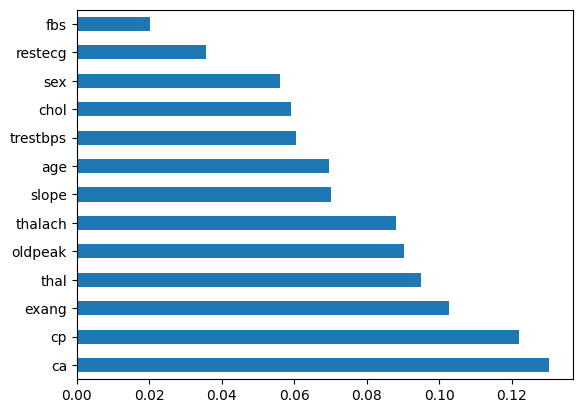

In [36]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### 3.Correlation Matrix with Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

<Axes: >

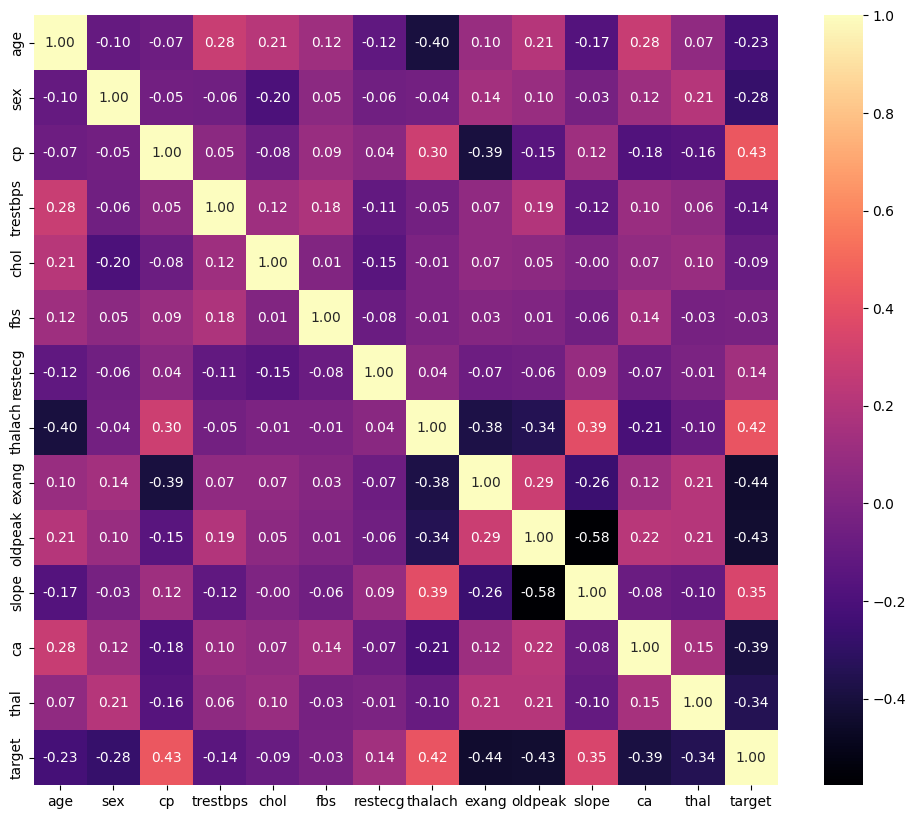

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [38]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


# 4.Data Visualizaiton<a name="4"></a>

### * Seaborn

In [39]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

#### 1.Countplot

In [40]:
df2 = df.copy()

In [41]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [42]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

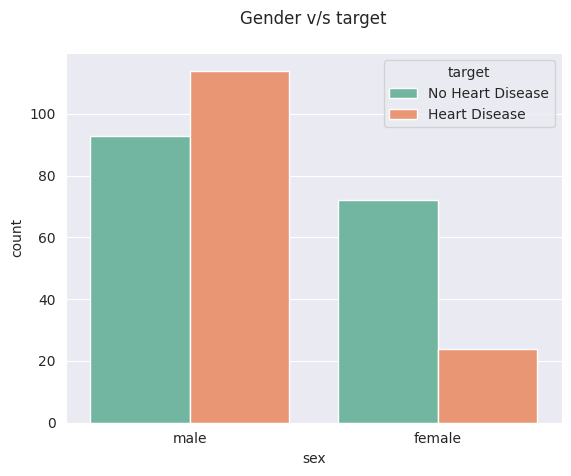

In [43]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

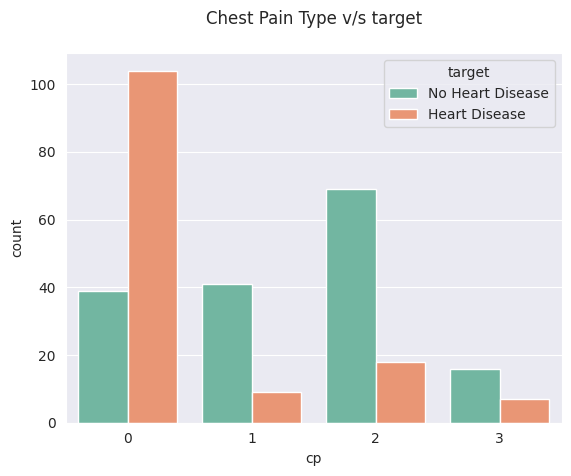

In [44]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


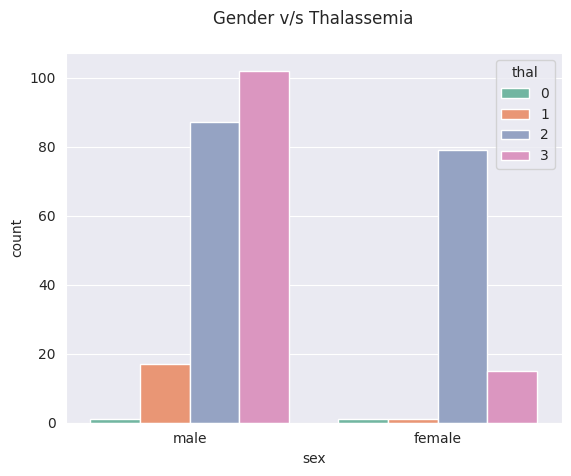

In [45]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

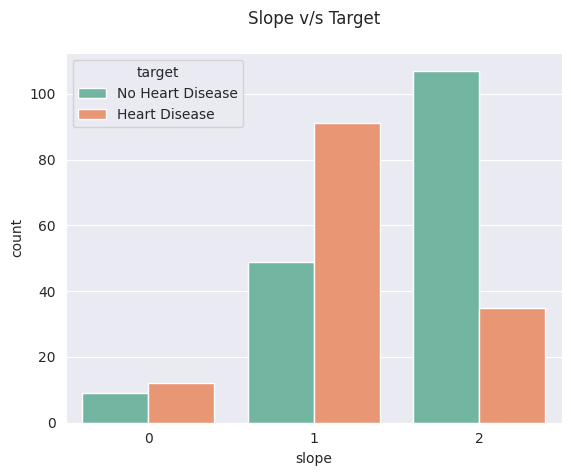

In [46]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

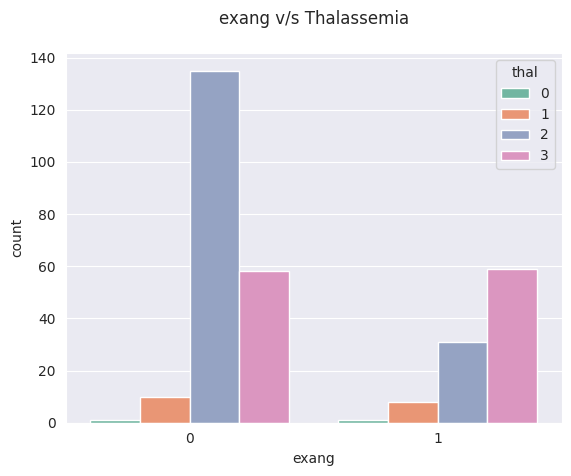

In [47]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

#### 2.Distplot

<ipython-input-48-ef2dfb73096e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

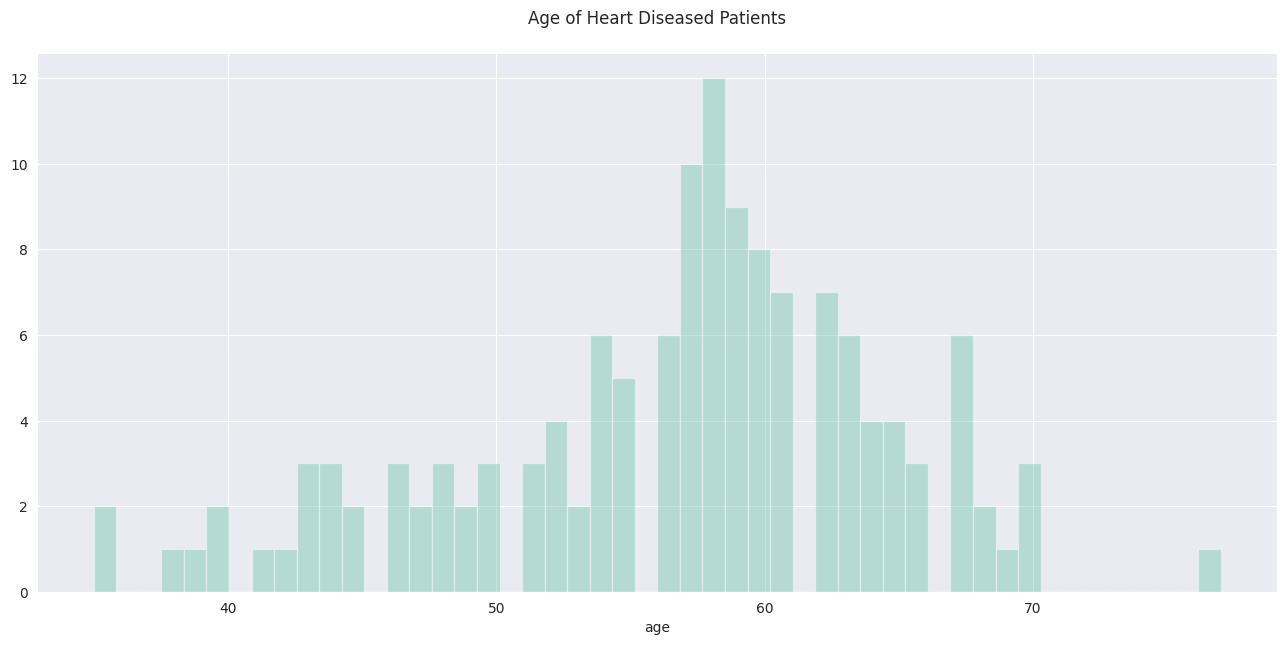

In [48]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

<ipython-input-49-9dad39bdef40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

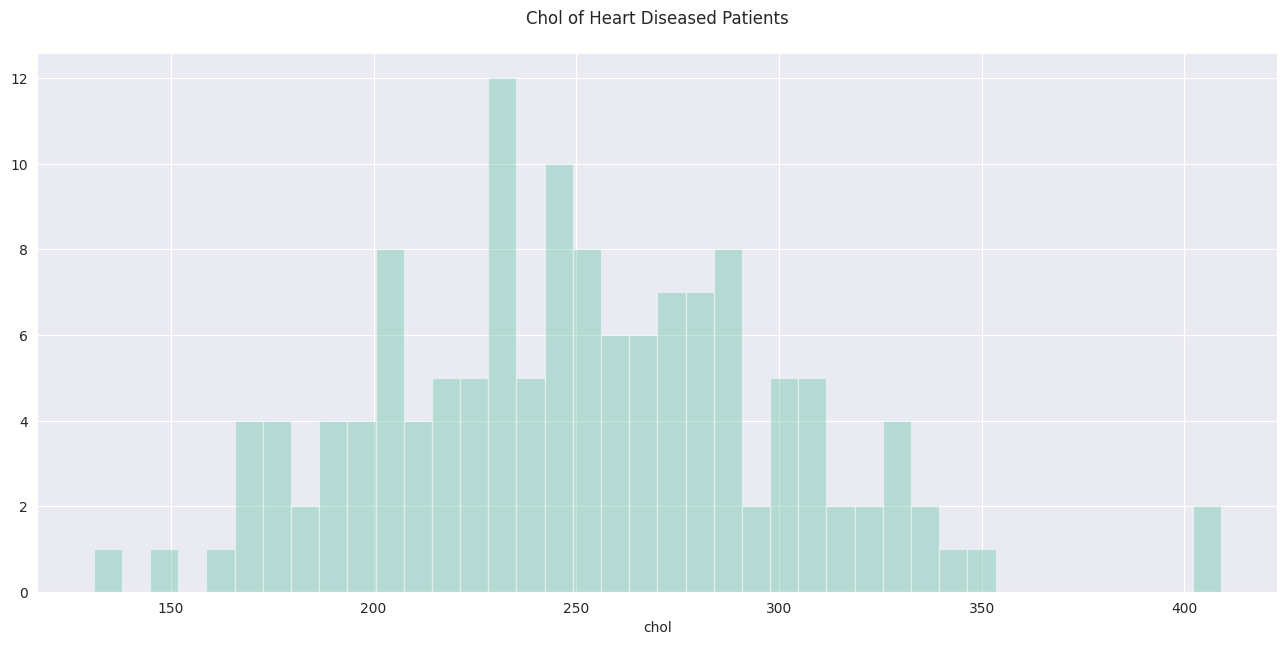

In [49]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

<ipython-input-50-a4d51c4e19c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

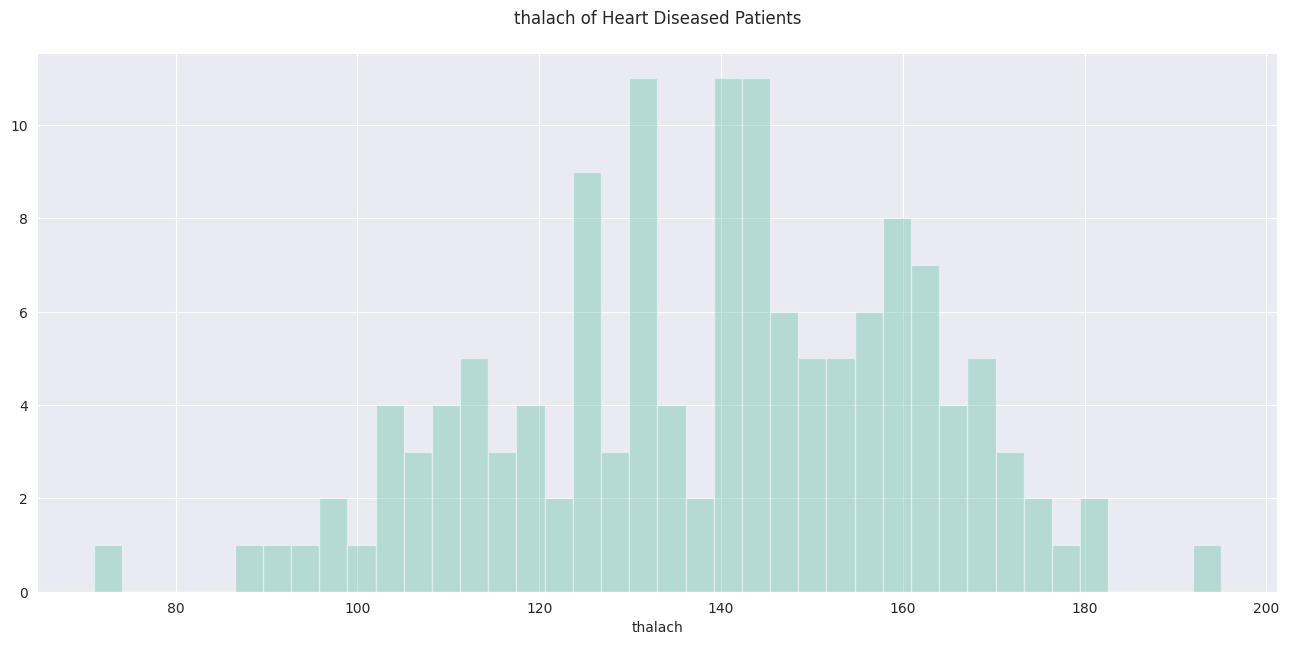

In [50]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

#### 3.Jointplot

In [51]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


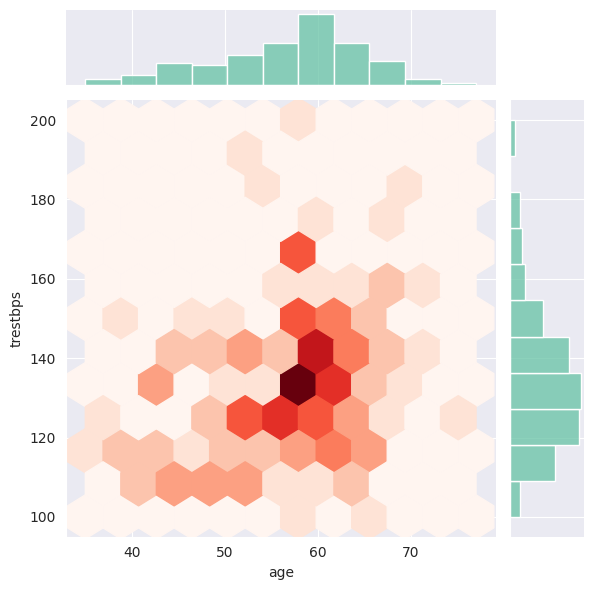

In [52]:

pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'

              )


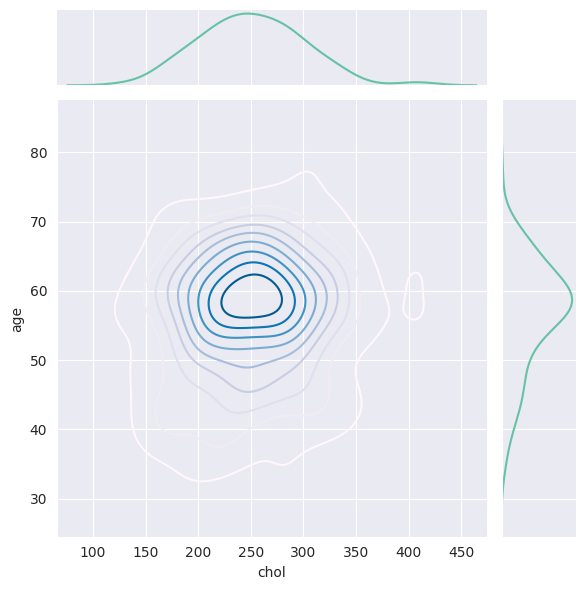

In [53]:


sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )


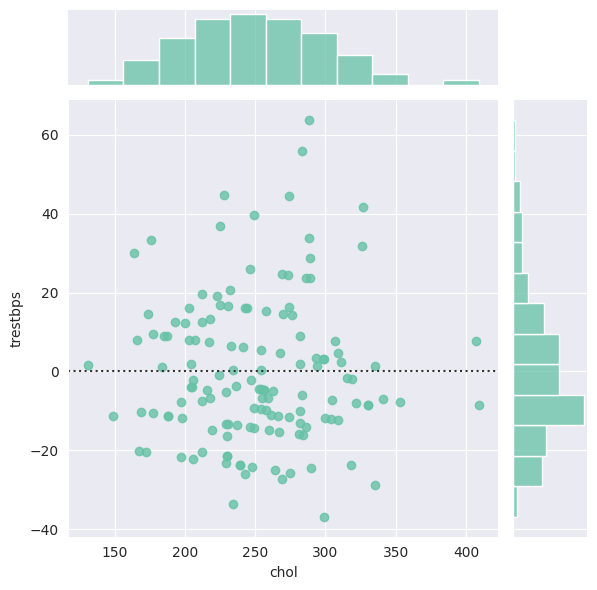

In [54]:

sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',

              )


####  4.Boxplot / violinplot

<Axes: xlabel='target', ylabel='age'>

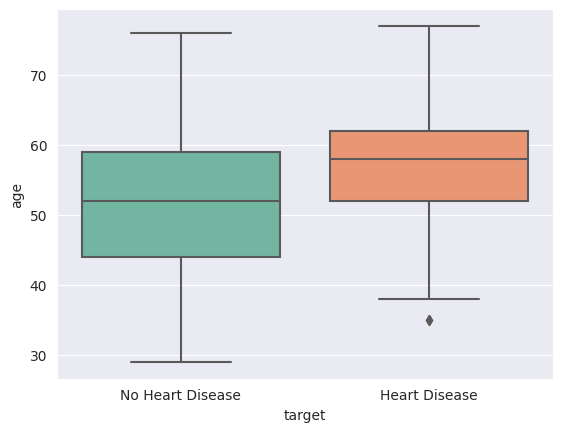

In [55]:
sns.boxplot(data=df2,x='target',y='age')

<Axes: xlabel='ca', ylabel='age'>

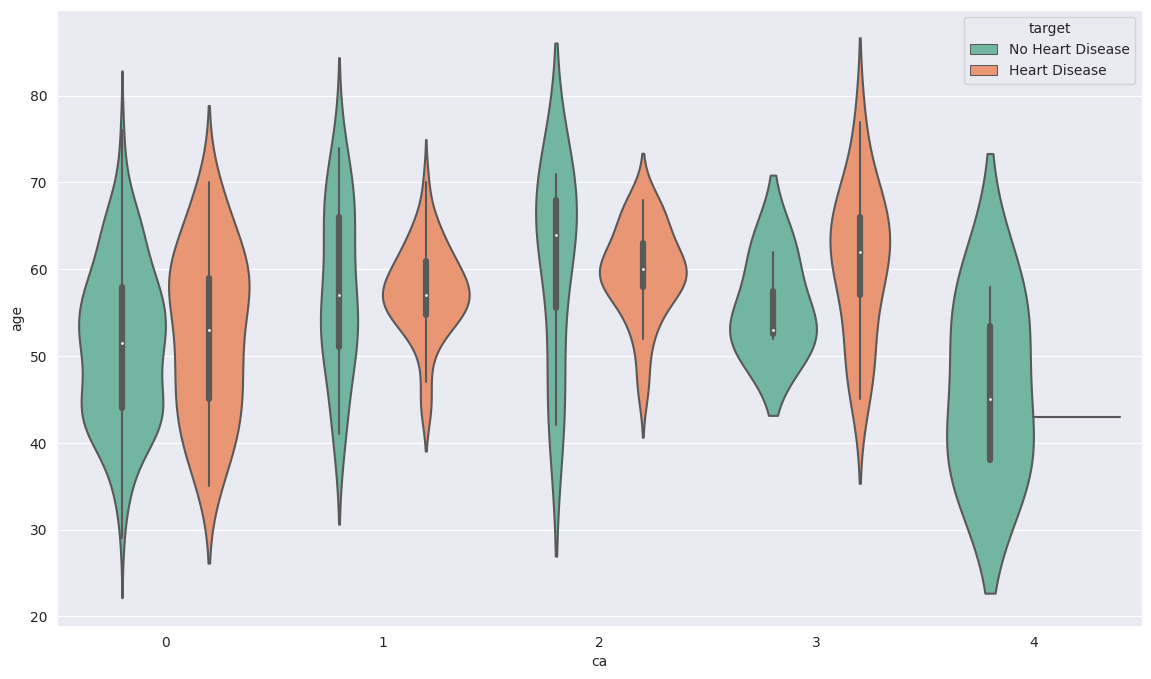

In [56]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

<Axes: xlabel='cp', ylabel='thalach'>

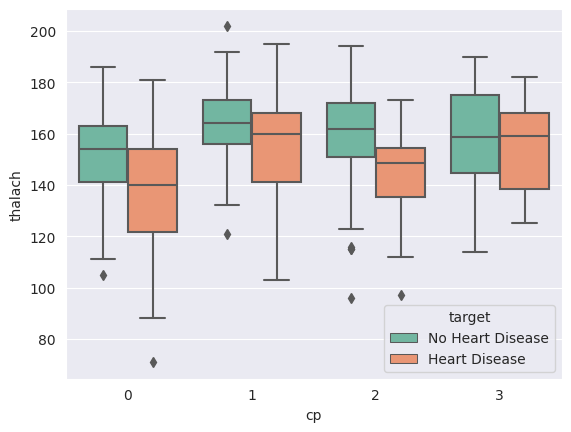

In [57]:
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

<Axes: xlabel='fbs', ylabel='trestbps'>

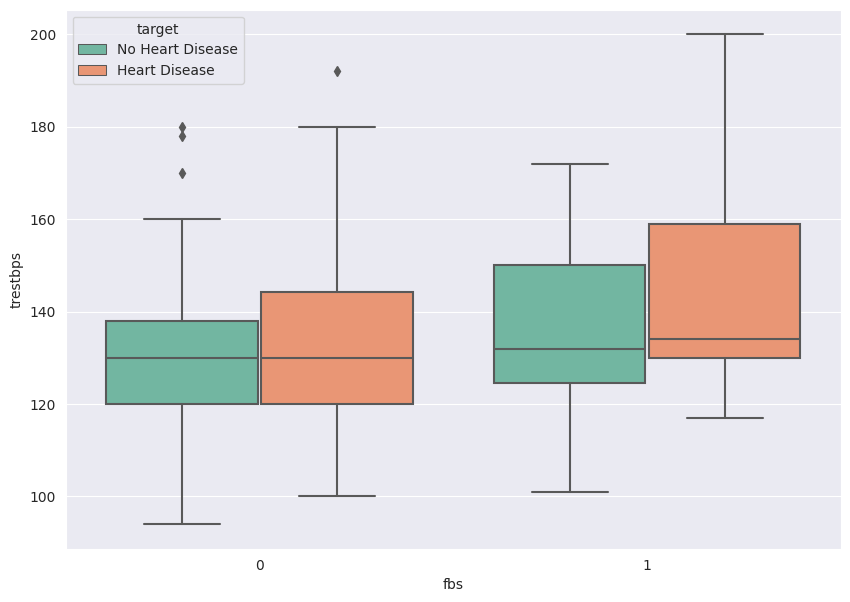

In [58]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

<Axes: xlabel='exang', ylabel='oldpeak'>

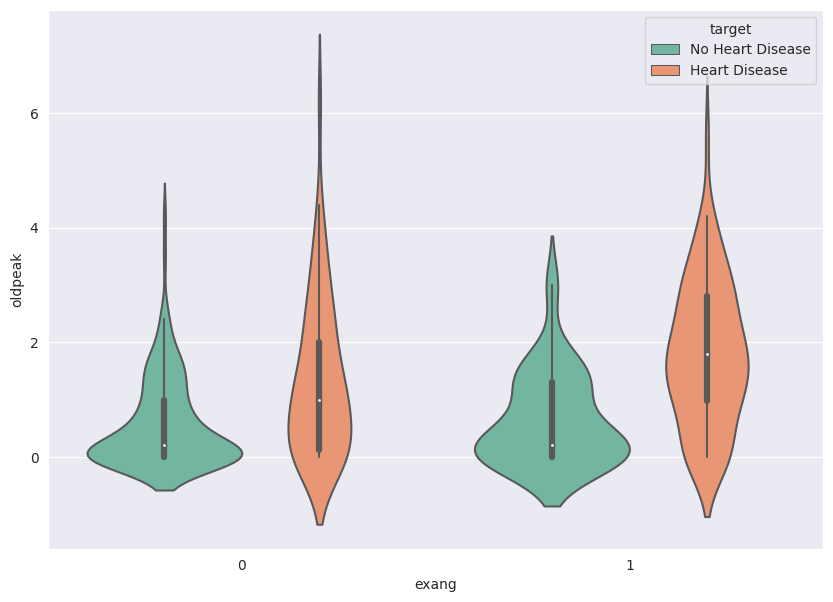

In [59]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

<Axes: xlabel='slope', ylabel='thalach'>

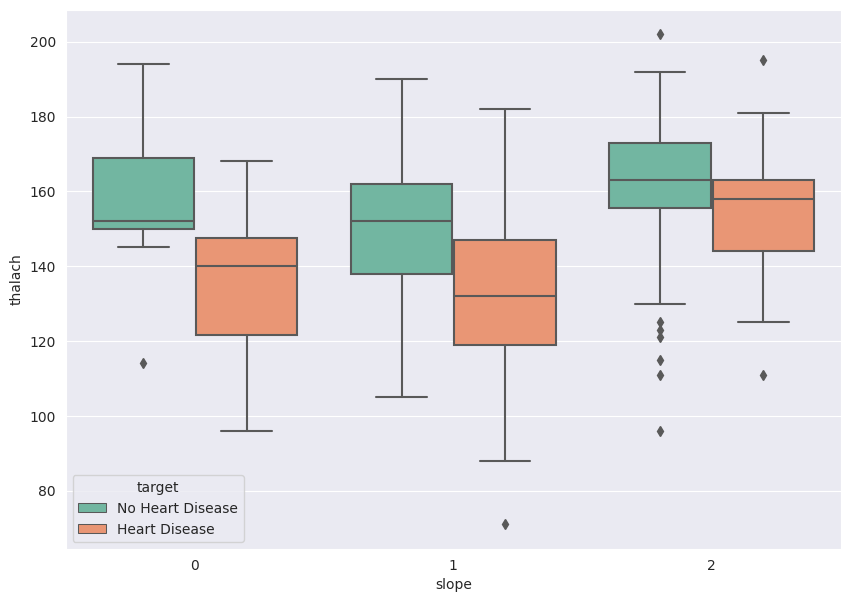

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

<Axes: xlabel='thal', ylabel='oldpeak'>

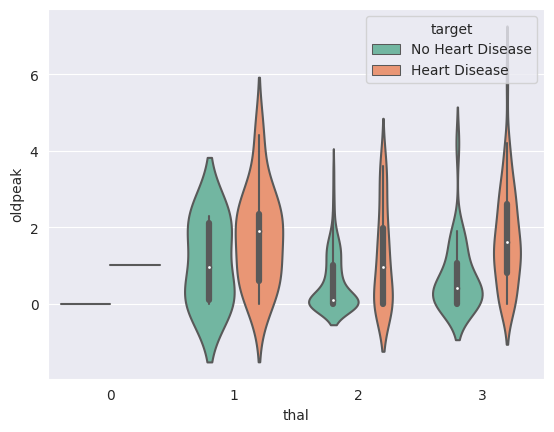

In [61]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

<Axes: xlabel='target', ylabel='thalach'>

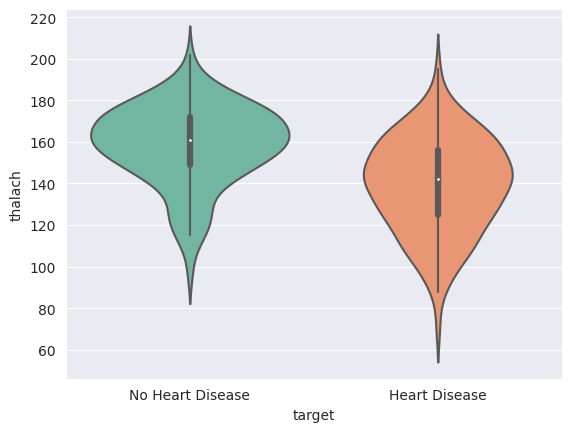

In [62]:
sns.violinplot(data=df2,x='target',y='thalach')

####5.Cluster Map

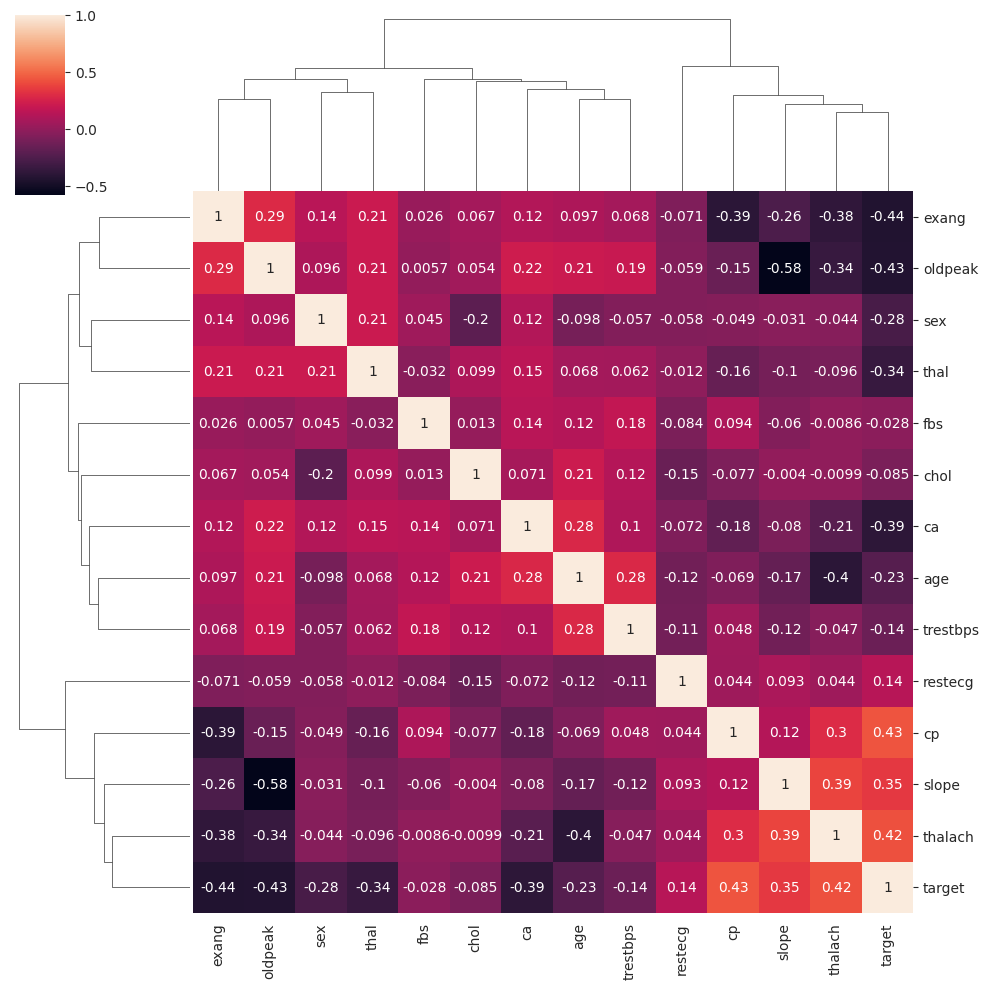

In [63]:
sns.clustermap(df.corr(),annot=True)

####5.Pairplot

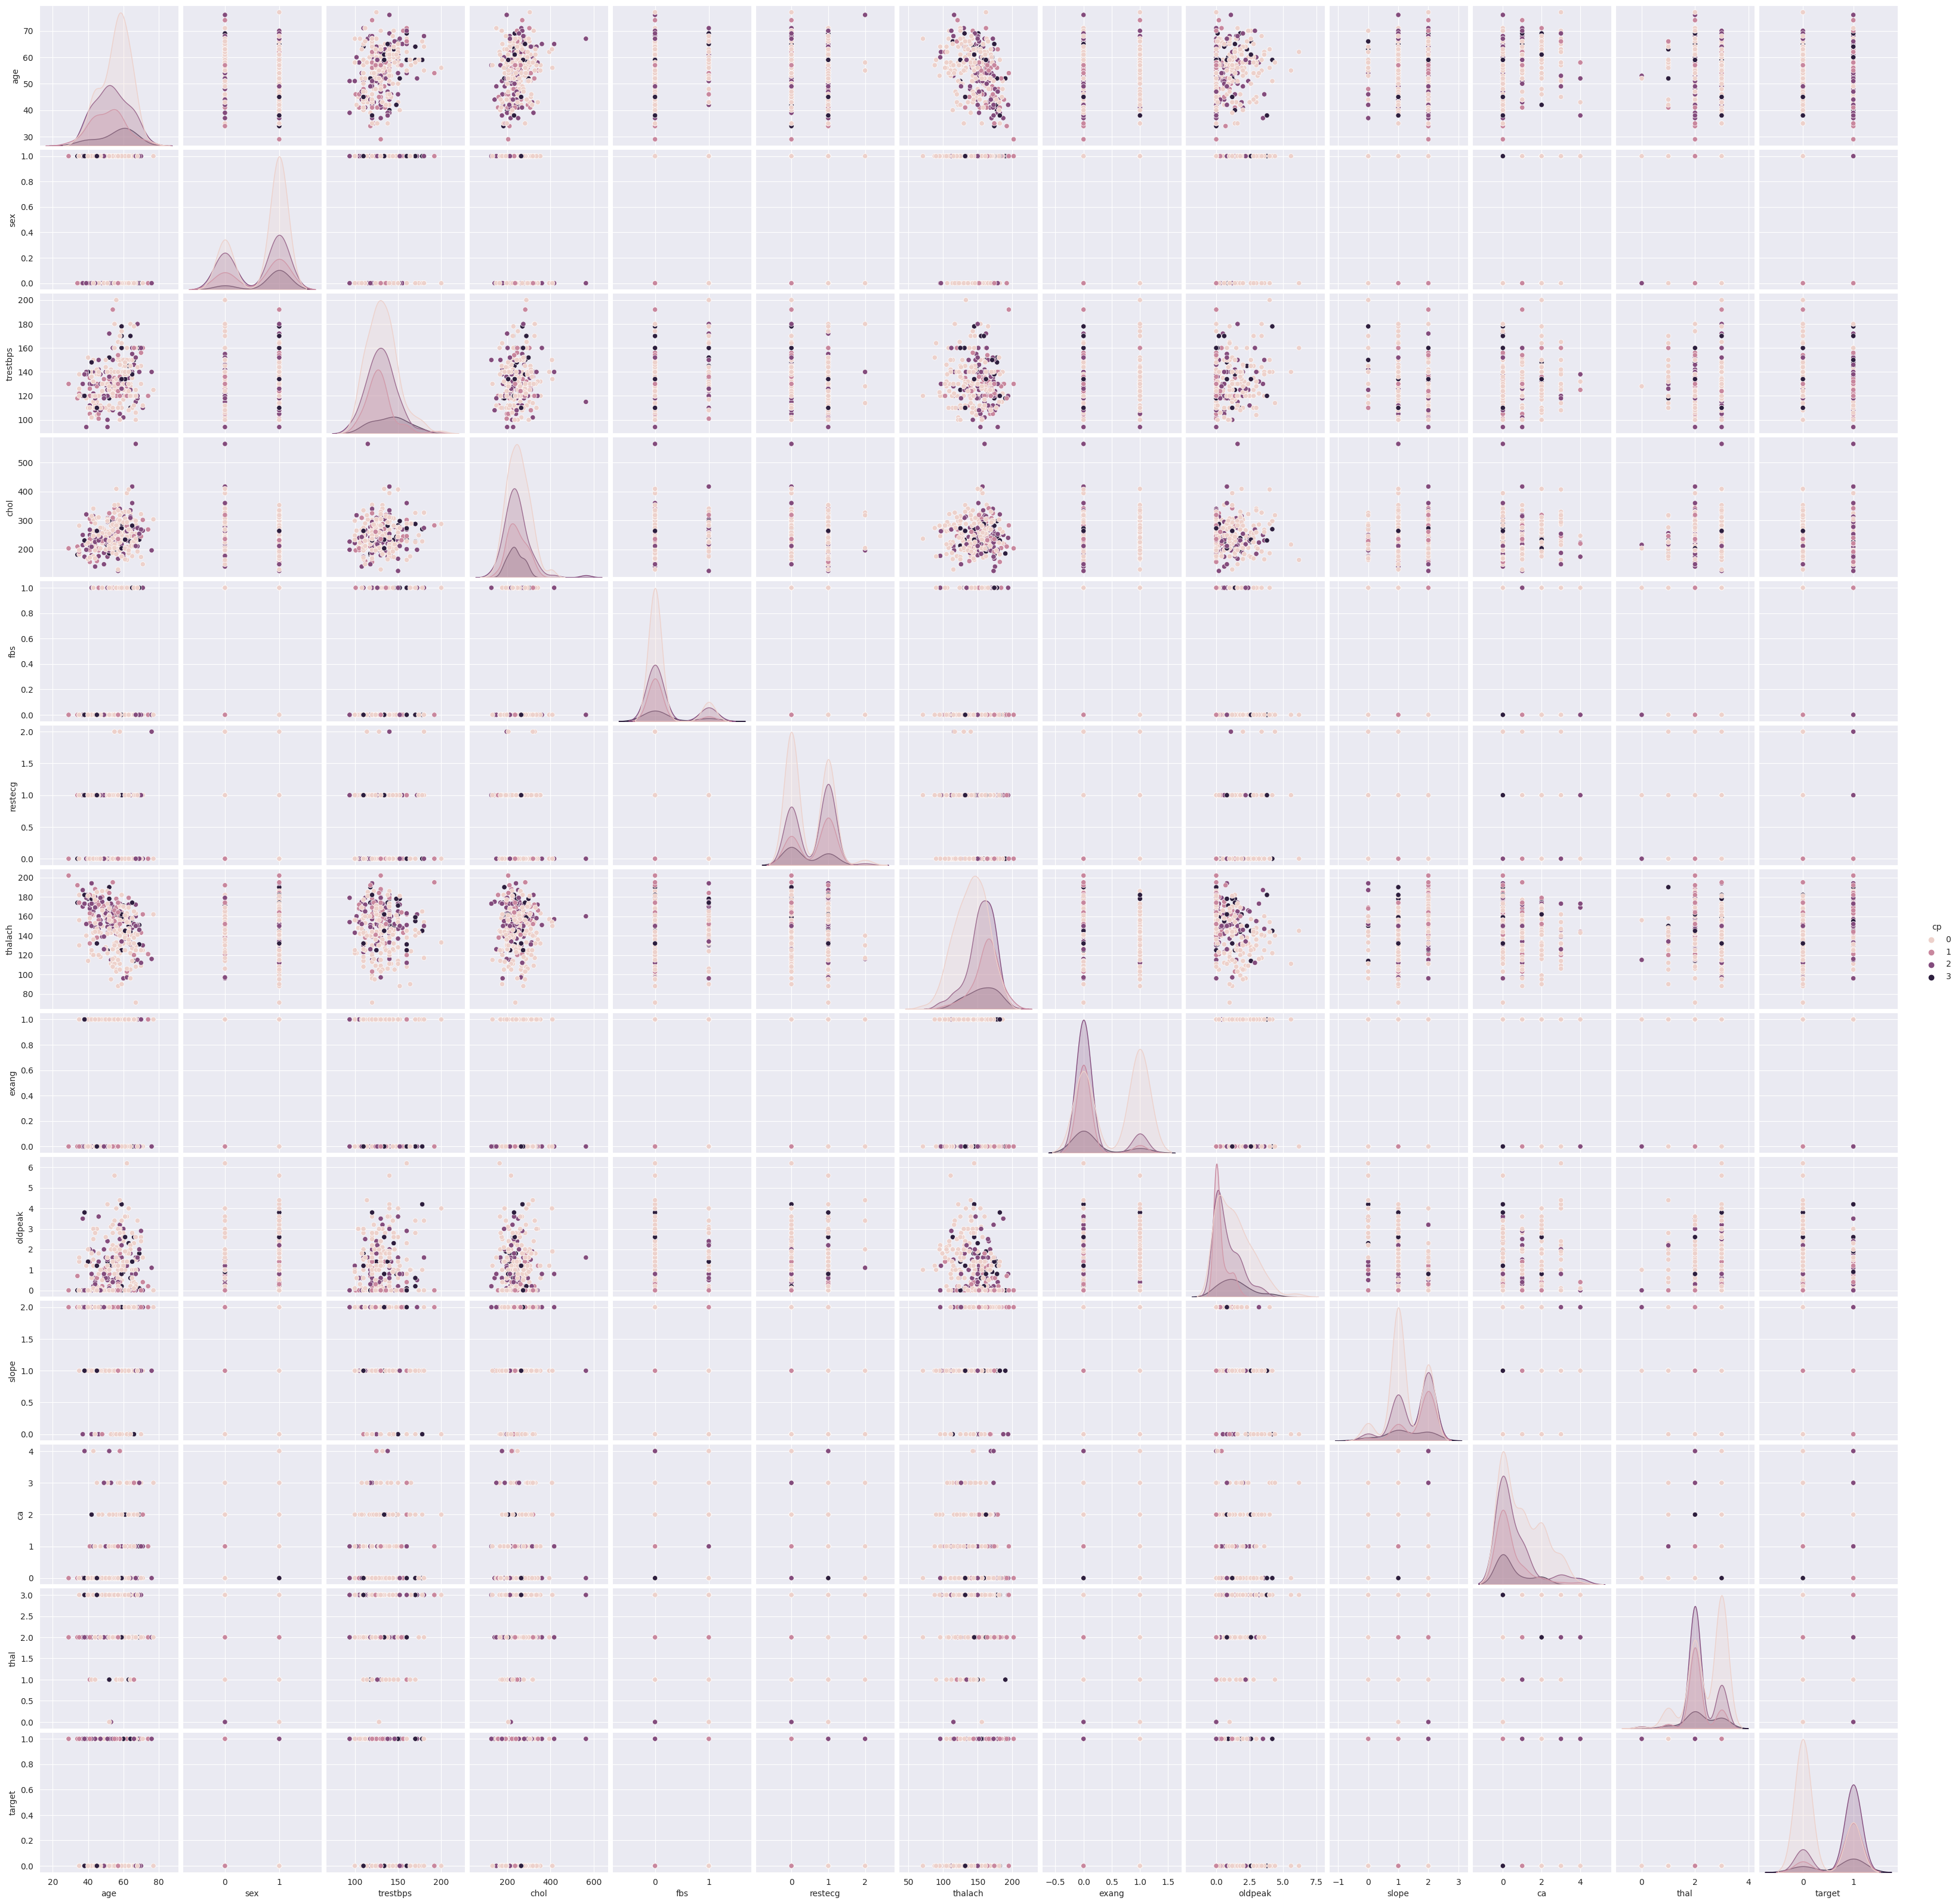

In [64]:
sns.pairplot(df,hue='cp')

## * Classification Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7472527472527473


In [68]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

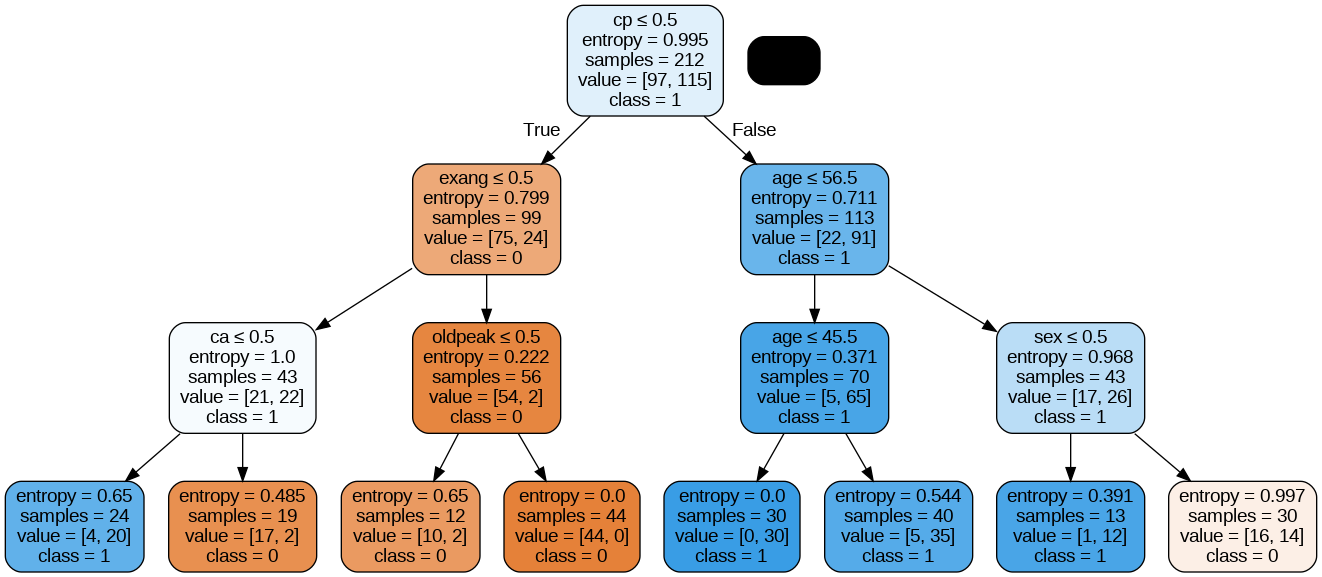

In [76]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363


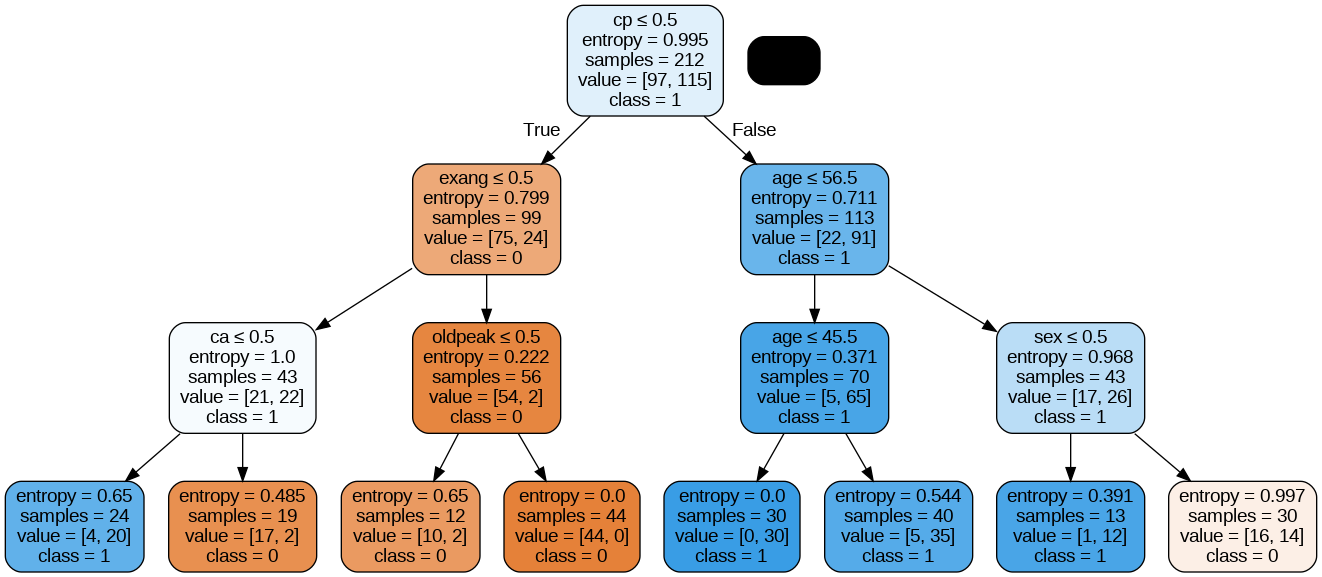

In [78]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# 5.Data Pre-processing<a name="5"></a>

### * Pre-processing

Change Name of the column

In [79]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

We have 4 Categorical columns as seen in Data Description using pandas profiling:

cp - chest_pain_type

restecg - rest_ecg_type

slope - st_slope_type

thal - thalassemia_type

Generating categorical columns values

In [80]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [81]:
df.head()

age  sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1    typical angina                     145          233   
1   37    1  non-anginal pain                     130          250   
2   41    0   atypical angina                     130          204   
3   56    1   atypical angina                     120          236   
4   57    0      asymptomatic                     120          354   

   fasting_blood_sugar                 rest_ecg_type  max_heart_rate_achieved  \
0                    1  left ventricular hypertrophy                      150   
1                    0                        normal                      187   
2                    0  left ventricular hypertrophy                      172   
3                    0                        normal                      178   
4                    0                        normal                      163   

   exercise_induced_angina  st_depression st_slope_type  num_major_vessels  \
0                        0            2.3   downsloping                  0   
1                        0            3.5   downsloping                  0   
2                        0            1.4     upsloping                  0   
3                        0            0.8     upsloping                  0   
4                        1            0.6     upsloping                  0   

  thalassemia_type  target  
0     fixed defect       1  
1           normal       1  
2           normal       1  
3           normal       1  
4           normal       1

### * One Hot Encoding

In [82]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [83]:
df_temp = data['thalassemia_type_fixed defect']

In [84]:
data = pd.get_dummies(df, drop_first=True)

In [85]:
data.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      150                        0            2.3   
1                      187                        0            3.5   
2                      172                        0            1.4   
3                      178                        0            0.8   
4                      163                        1            0.6   

   num_major_vessels  target  chest_pain_type_atypical angina  \
0                  0       1                                0   
1                  0       1                                0   
2                  0       1                                1   
3                  0       1                                1   
4                  0       1                                0   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                                 0                               1   
1                                 1                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   rest_ecg_type_left ventricular hypertrophy  rest_ecg_type_normal  \
0                                           1                     0   
1                                           0                     1   
2                                           1                     0   
3                                           0                     1   
4                                           0                     1   

   st_slope_type_flat  st_slope_type_upsloping  thalassemia_type_normal  \
0                   0                        0                        0   
1                   0                        0                        1   
2                   0                        1                        1   
3                   0                        1                        1   
4                   0                        1                        1   

   thalassemia_type_nothing  thalassemia_type_reversable defect  
0                         0                                   0  
1                         0                                   0  
2                         0                                   0  
3                         0                                   0  
4                         0                                   0

Since one hot encoding dropped "thalassemia_type_fixed defect" column which was a useful column compared to 'thalassemia_type_nothing' which is a null column, we dropped 'thalassemia_type_nothing' and concatinated 'thalassemia_type_fixed defect'

In [86]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      150                        0            2.3   
1                      187                        0            3.5   
2                      172                        0            1.4   
3                      178                        0            0.8   
4                      163                        1            0.6   

   num_major_vessels  target  ...  chest_pain_type_non-anginal pain  \
0                  0       1  ...                                 0   
1                  0       1  ...                                 1   
2                  0       1  ...                                 0   
3                  0       1  ...                                 0   
4                  0       1  ...                                 0   

   chest_pain_type_typical angina  rest_ecg_type_left ventricular hypertrophy  \
0                               1                                           1   
1                               0                                           0   
2                               0                                           1   
3                               0                                           0   
4                               0                                           0   

   rest_ecg_type_normal  st_slope_type_flat  st_slope_type_upsloping  \
0                     0                   0                        0   
1                     1                   0                        0   
2                     0                   0                        1   
3                     1                   0                        1   
4                     1                   0                        1   

   thalassemia_type_normal  thalassemia_type_nothing  \
0                        0                         0   
1                        1                         0   
2                        1                         0   
3                        1                         0   
4                        1                         0   

   thalassemia_type_reversable defect  thalassemia_type_fixed defect  
0                                   0                              1  
1                                   0                              0  
2                                   0                              0  
3                                   0                              0  
4                                   0                              0  

[5 rows x 21 columns]

In [87]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

# 6.Logistic Regression<a name="6"></a>

##### 1.Gather columns

In [88]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [89]:
X = result.drop('target', axis = 1)


In [90]:
y = result['target']

##### 2.Splitting Data

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### 3.Normalization

In [94]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

#####4.Fitting into Model

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logre = LogisticRegression()

In [97]:
logre.fit(X_train,y_train)

LogisticRegression()

####5.Prediction

In [98]:
y_pred = logre.predict(X_test)

In [99]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [100]:
result  = pd.DataFrame(dic)

In [101]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

###6.Model Evaluation

In [102]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



[[24  3]
 [ 5 29]]


<Axes: >

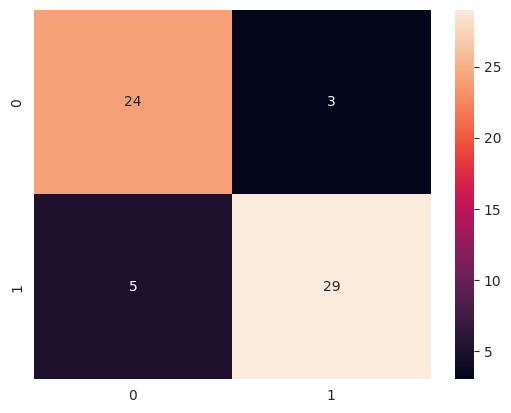

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

ROC Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

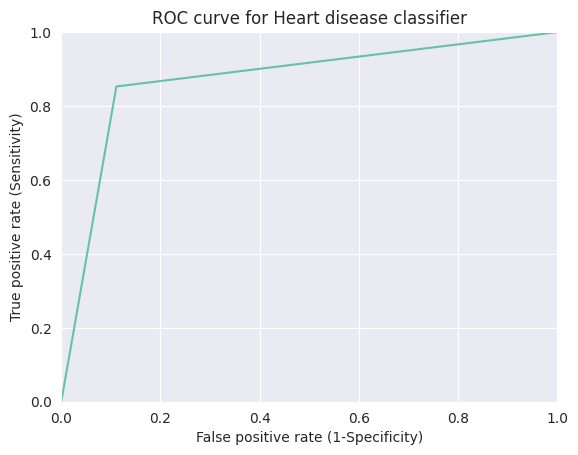

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [106]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8709150326797386

#7.Conclusion<a name="7"></a>

###1.Coefficients

In [107]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.96772424]


Coeffecient
chest_pain_type_non-anginal pain               1.281633
chest_pain_type_typical angina                 1.036787
max_heart_rate_achieved                        1.028382
thalassemia_type_normal                        0.754872
chest_pain_type_atypical angina                0.732086
rest_ecg_type_normal                           0.338507
st_slope_type_upsloping                        0.212089
rest_ecg_type_left ventricular hypertrophy     0.066738
thalassemia_type_fixed defect                  0.009411
fasting_blood_sugar                           -0.135551
age                                           -0.415560
cholesterol                                   -0.457060
st_slope_type_flat                            -0.466004
resting_blood_pressure                        -0.537316
thalassemia_type_reversable defect            -0.612915
exercise_induced_angina                       -0.786479
sex                                           -1.124012
st_depression                                 -1.146936
num_major_vessels                             -2.272170

<Figure size 1000x1200 with 0 Axes>

In [108]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [109]:
df4 = df[df['target'] == 0 ][['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']] #target 0 - people with heart disease

##2.Analysis

<ipython-input-110-4e3d4e737ef0>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='max_heart_rate_achieved', ylabel='Density'>

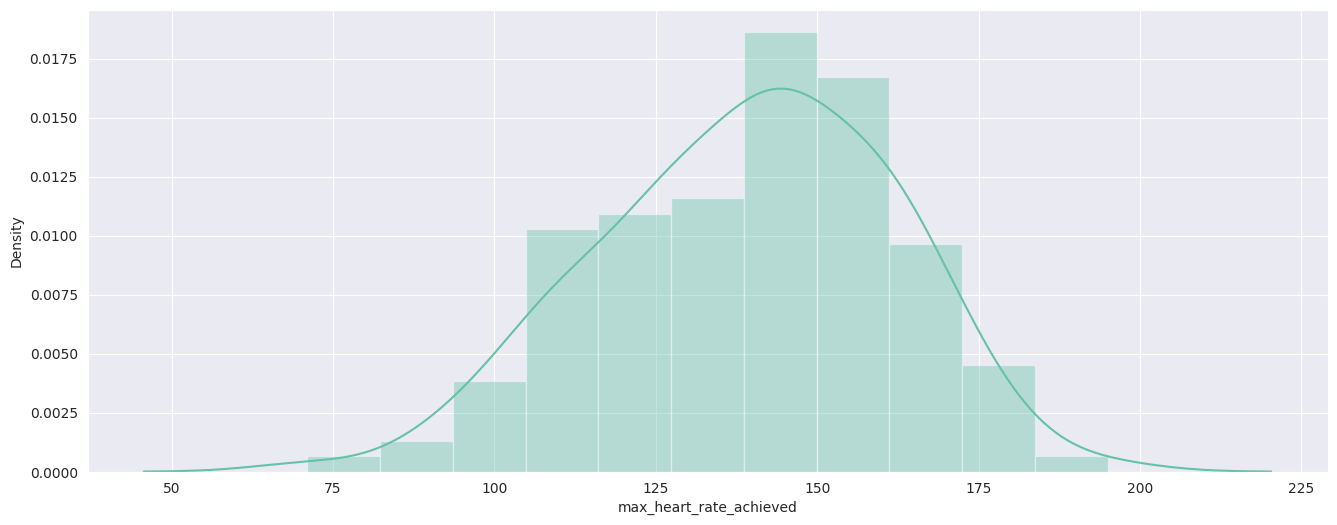

In [110]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate_achieved'])

Heart Diseased Patients visualization

<Axes: xlabel='rest_ecg_type', ylabel='cholesterol'>

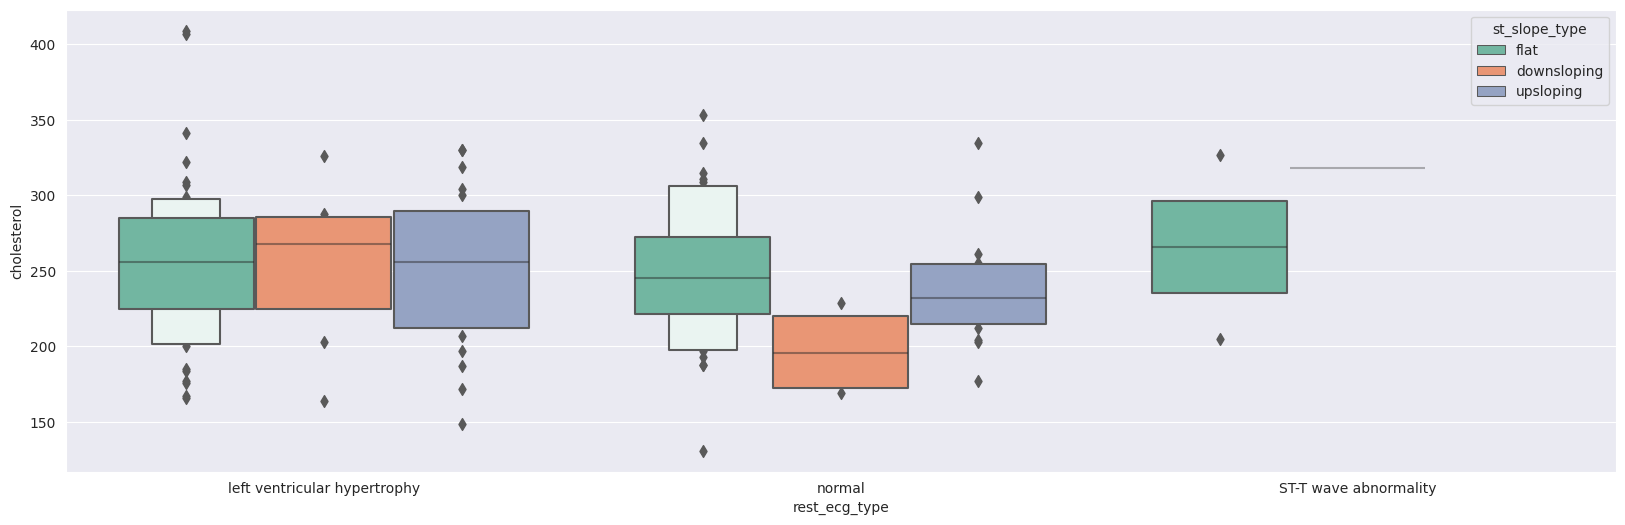

In [111]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='rest_ecg_type',y='cholesterol',hue='st_slope_type')

<Axes: xlabel='chest_pain_type', ylabel='max_heart_rate_achieved'>

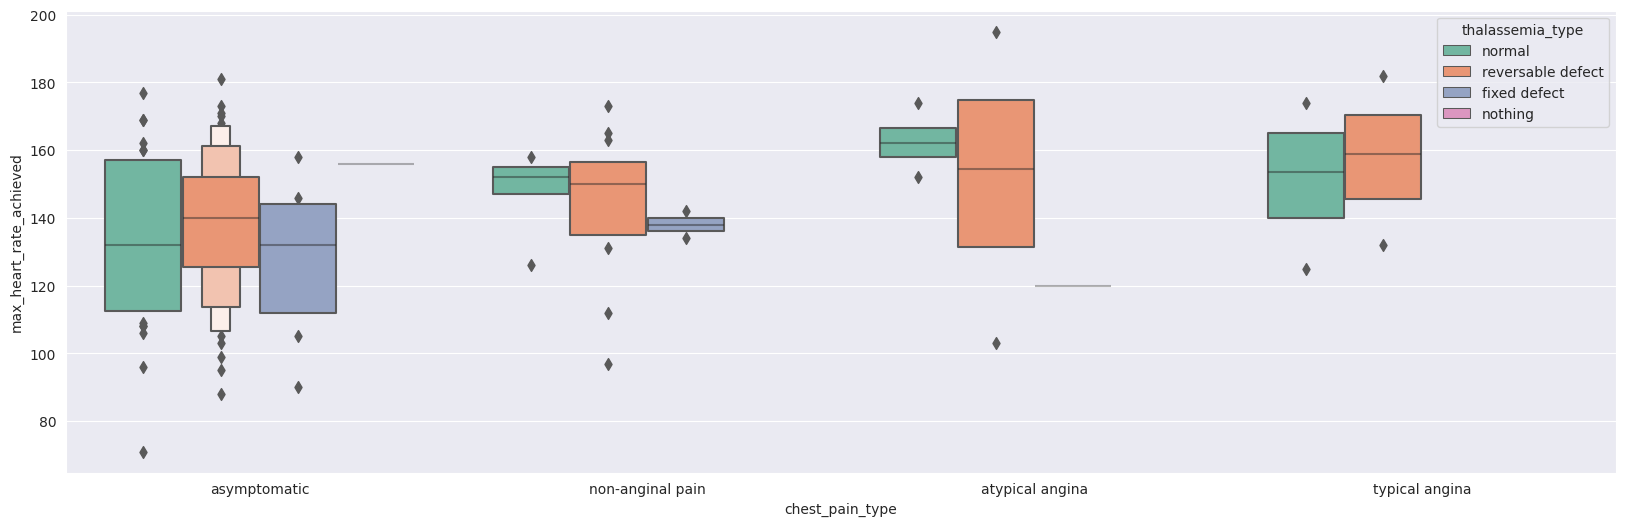

In [112]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='chest_pain_type',y='max_heart_rate_achieved',hue='thalassemia_type')

Shap

Shap Values

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.8 MB/s eta 0:00:00


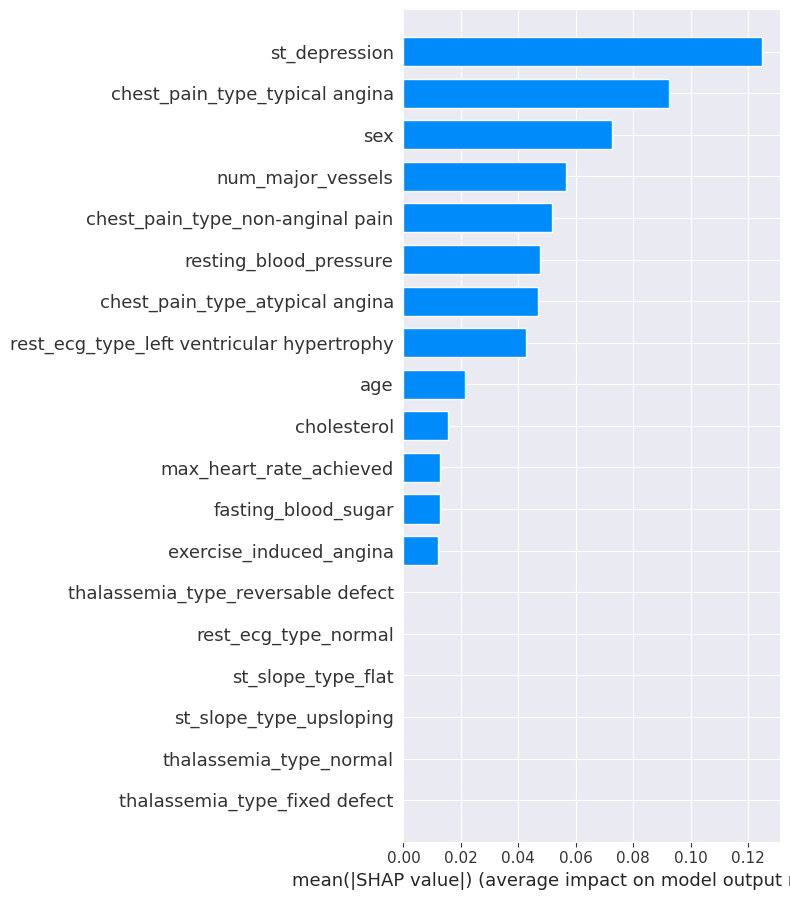

In [113]:
!pip install shap
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

Shap value for Model Explaination

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


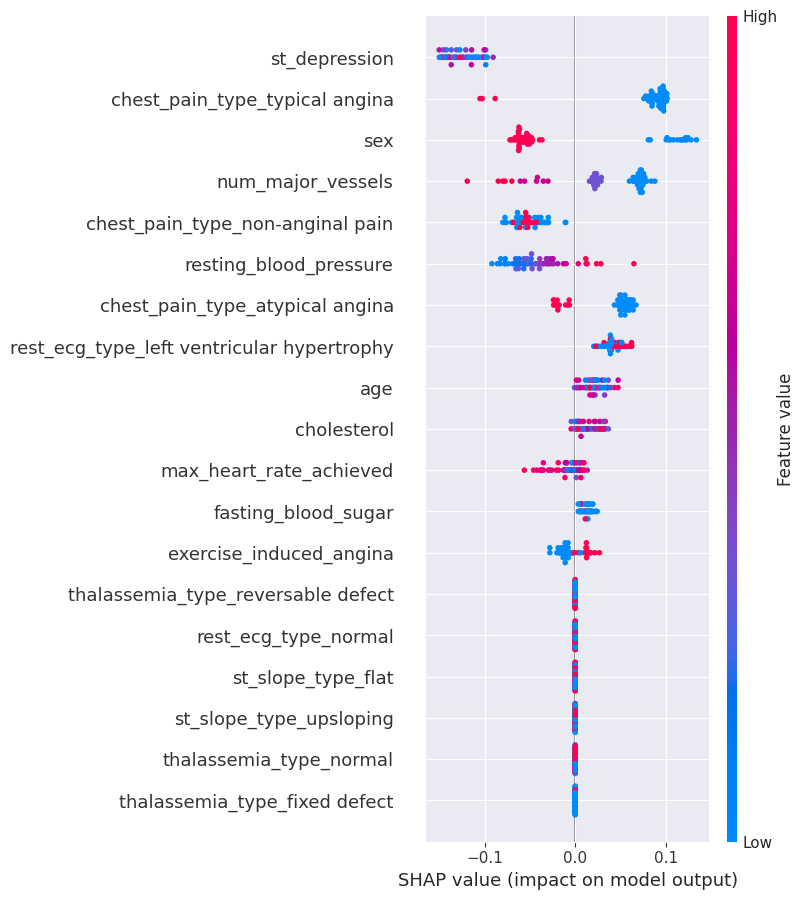

In [114]:
shap.summary_plot(shap_values[1], X_test)

In [115]:
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

Reports for two Patients

In [116]:

patients = X_test.iloc[3,:].astype(float)
patients_target = y_test.iloc[3:4]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  0


In [117]:
patients = X_test.iloc[33,:].astype(float)
patients_target = y_test.iloc[33:34]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  1


In [118]:
 y_test.iloc[10:11]

111    1
Name: target, dtype: int64

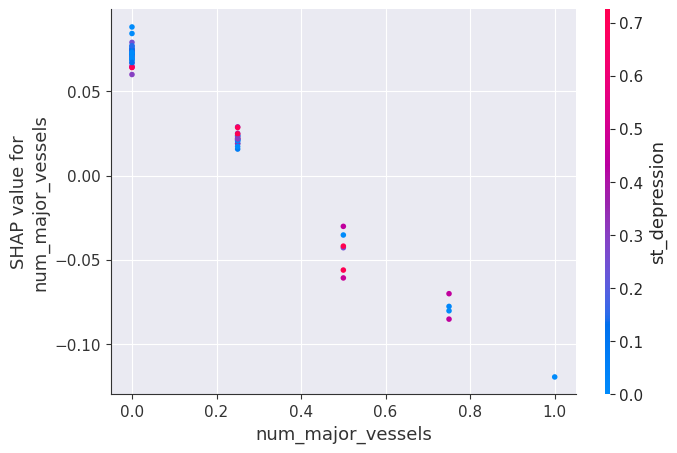

In [119]:
# dependence plot

shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index = "st_depression")

In [120]:
shap_values = explainer.shap_values(X_train.iloc[:50],check_additivity=False)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

##3.Conclusion


*  The Area under the ROC curve is 87.09% which is somewhat satisfactory.
*  The model predicted with 86.88% accuracy. The model is more specific than sensitive.
*  According to this model the major features contributing in precision of predciting model are shown in the heatmap in order.






<Axes: >

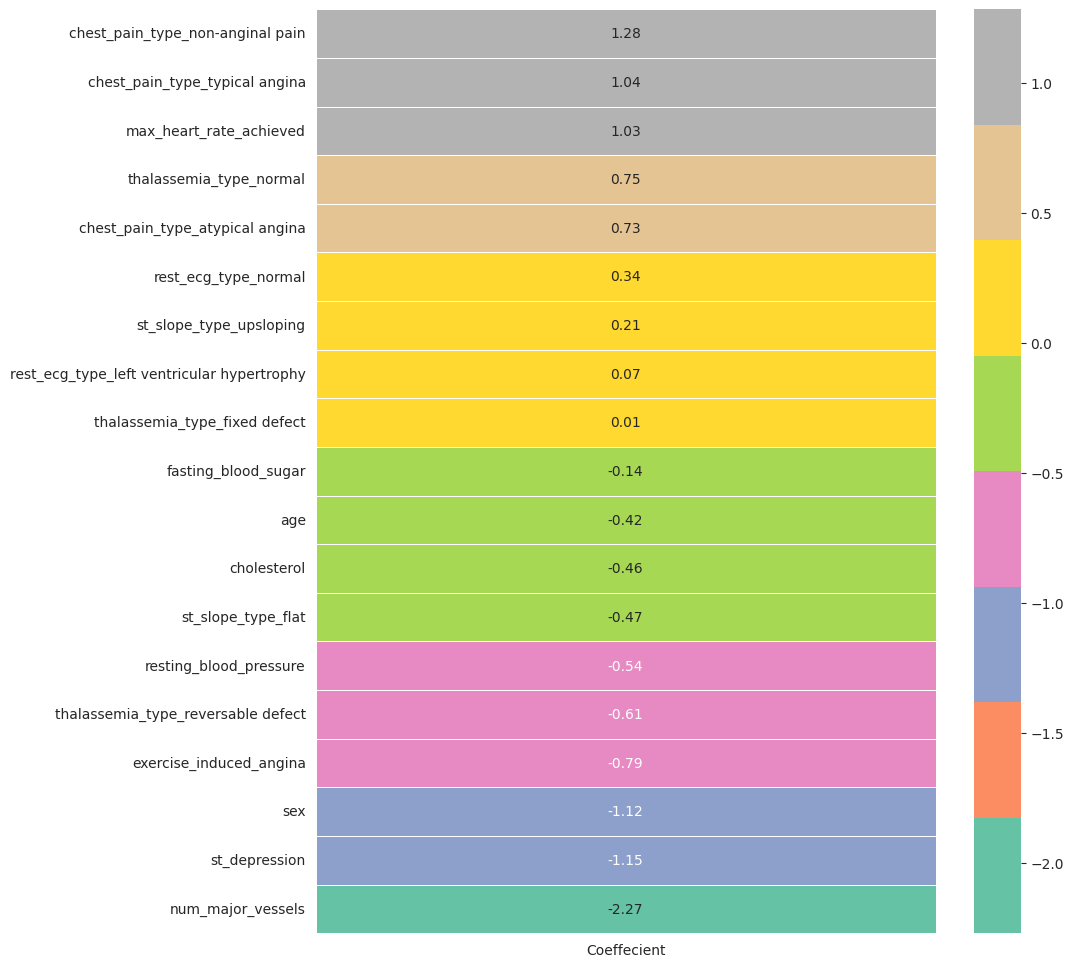

In [121]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)